<a id="5"></a>


<font color="black" size=+1><b> Recomendation Tempat Wisata Toba Preprocessing using  Deep Learning </b></font>

<a id="4"></a>

---
<font color="BLUE" size=+1><b>  Kelompok 7 - Bussiness Understanding </b></font>

---
    Nama Anggota
    1. Widya Manurung       12S21039
    2. Endang Siregar       12S21056
    3. Glory Hutahean       12S21060

Model 1: Collaborative Filtering (CF) Deep LearningA

Collaborative Filtering (CF) dengan Deep Learning adalah pendekatan modern untuk sistem rekomendasi yang menggabungkan konsep Collaborative Filtering klasik dengan kekuatan representasi fitur dari Deep Learning.

1. Import Library

Pada data perparation bertujuan untuk menginport library yang digunakan dalam memproses data dan juga membaca data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from tensorflow.keras.optimizers import Adam

2. Memuat dan Membersihkan Data

Kode ini memuat dataset dari file CSV yang berisi data terkait ulasan tempat wisata di Toba. File tersebut diimpor ke dalam DataFrame menggunakan Pandas untuk mempermudah manipulasi dan analisis data.

In [2]:
# Load the dataset
file_path = ('/content/Tempat-Wisata-Toba-Preprocessing.csv')
data = pd.read_csv(file_path)

In [3]:
data

,Unnamed: 0.1,Unnamed: 0,address,PlaceID,Nama_tempat_wisata,Category,ReviewerId,Rating,Reviews
0,0,0,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.126030e+20,5.0,NaN
1,1,1,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.119090e+20,5.0,bagus
2,2,2,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.078860e+20,5.0,NaN
3,3,3,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.130720e+20,5.0,sangat menyenagkan
4,4,4,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.061730e+20,5.0,bebas foto dimana aja cuma 2k
...,...,...,...,...,...,...,...,...,...
43221,43221,43221,"MWMG+GCG, Jalan Siborong Borong - Parapat, Sib...",101,Danau Toba Parapat,Wisata Bahari,1.109990e+20,5.0,NaN
43222,43222,43222,"MWMG+GCG, Jalan Siborong Borong - Parapat, Sib...",101,Danau Toba Parapat,Wisata Bahari,1.130740e+20,5.0,NaN
43223,43223,43223,"MWMG+GCG, Jalan Siborong Borong - Parapat, Sib...",101,Danau Toba Parapat,Wisata Bahari,1.081140e+20,5.0,NaN
43224,43224,43224,"MWMG+GCG, Jalan Siborong Borong - Parapat, Sib...",101,Danau Toba Parapat,Wisata Bahari,1.121780e+20,5.0,NaN


In [4]:
# Rename relevant columns
data = data.rename(columns={
    'ReviewerId': 'userId',
    'PlaceID': 'itemId',
    'Rating': 'rating'
})
data = data[['userId', 'itemId', 'rating']].dropna()

In [5]:
# Encode userId and itemId
data['userId'] = data['userId'].astype('category').cat.codes
data['itemId'] = data['itemId'].astype('category').cat.codes

In [6]:
# Handle duplicates by averaging ratings
data = data.groupby(['userId', 'itemId']).rating.mean().reset_index()

In [7]:
# Train-test split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

Proses memuat dan membersihkan data dimulai dengan memuat dataset ulasan wisata, diikuti dengan pengubahan nama kolom menjadi lebih sederhana (**userId**, **itemId**, dan **rating**) untuk memudahkan manipulasi. Data yang tidak relevan seperti nilai kosong (**NaN**) dihapus, sementara ID pengguna dan tempat wisata di-encode menjadi nilai numerik agar kompatibel dengan model. Duplikasi data ditangani dengan menghitung rata-rata rating untuk pasangan **userId-itemId** yang sama, memastikan representasi data lebih akurat. Terakhir, data dibagi menjadi data pelatihan dan pengujian menggunakan train-test split, dengan 20% data digunakan untuk evaluasi. Proses ini bertujuan memastikan data bersih, terstruktur, dan siap digunakan dalam model, sehingga mendukung hasil prediksi yang akurat dan dapat diandalkan.

3. Membangun Model Collaborative Filtering

In [8]:
# Get the number of unique users and items
num_users = data['userId'].nunique()
num_items = data['itemId'].nunique()

Kode ini digunakan untuk menghitung jumlah pengguna dan item unik dalam dataset yang akan digunakan untuk membangun model Collaborative Filtering. Variabel **`num_users`** menghitung jumlah pengguna unik dalam data dengan menggunakan metode `nunique()` pada kolom `userId`, sementara **`num_items`** menghitung jumlah item unik dengan metode yang sama pada kolom `itemId`. Nilai ini penting karena dalam Collaborative Filtering, jumlah pengguna dan item akan digunakan untuk menentukan ukuran embedding layer pada model yang dibangun. Informasi ini juga memberikan gambaran tentang kompleksitas model yang akan dibuat, di mana semakin banyak pengguna dan item, semakin besar model yang diperlukan. Dengan memahami jumlah pengguna dan item ini, kita dapat merancang arsitektur jaringan saraf dengan lebih efektif untuk memprediksi preferensi pengguna dalam sistem rekomendasi.

In [9]:
# Model architecture with improvements
user_input = Input(shape=(1,), name='user_input')
item_input = Input(shape=(1,), name='item_input')

user_embedding = Embedding(num_users, 100, name='user_embedding', embeddings_regularizer=tf.keras.regularizers.l2(0.01))(user_input)
item_embedding = Embedding(num_items, 100, name='item_embedding', embeddings_regularizer=tf.keras.regularizers.l2(0.01))(item_input)

user_flatten = Flatten()(user_embedding)
item_flatten = Flatten()(item_embedding)

Arsitektur ini menggunakan metode Collaborative Filtering dengan pendekatan matrix factorization yang didukung oleh embedding layer. Embedding ini memungkinkan model untuk mempelajari representasi yang semantik dari pengguna dan item berdasarkan pola interaksi mereka dalam data. Penggunaan regularisasi L2 membantu mencegah model menjadi terlalu kompleks atau overfit dengan memberikan penalti pada bobot yang memiliki nilai besar. Model ini dirancang agar dapat memprediksi interaksi antara pengguna dan item melalui operasi yang akan dilakukan setelah tahap embedding ini, seperti operasi dot product atau lapisan tambahan dalam model.

In [10]:
# Concatenate user and item embeddings
concat = Concatenate()([user_flatten, item_flatten])

In [11]:
# Dense layer for learning non-linear interactions
dense_1 = Dense(128, activation='relu')(concat)
dropout_1 = tf.keras.layers.Dropout(0.2)(dense_1)
dense_2 = Dense(64, activation='relu')(dropout_1)
dropout_2 = tf.keras.layers.Dropout(0.2)(dense_2)
output = Dense(1, activation='linear')(dropout_2)

model = Model(inputs=[user_input, item_input], outputs=output)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ user_input (InputLayer)   │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ item_input (InputLayer)   │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ user_embedding            │ (None, 1, 100)         │      1,501,100 │ user_input[0][0]       │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ item_embedding            │ (None, 1, 100)         │         10,100 │ item_input[0][0]       │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 100)            │              0 │ user_embedding[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 100)            │              0 │ item_embedding[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 200)            │              0 │ flatten[0][0],         │
│                           │                        │                │ flatten_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │         25,728 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 128)            │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 64)             │          8,256 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 64)             │              0 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 1)              │             65 │ dropout_1[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,545,249 (5.89 MB)

 Trainable params: 1,545,249 (5.89 MB)

 Non-trainable params: 0 (0.00 B)

Arsitektur model ini dirancang untuk mempelajari interaksi non-linear antara pengguna dan item dalam sistem rekomendasi menggunakan pendekatan Collaborative Filtering berbasis neural network. Model ini diawali dengan menggabungkan vektor embedding pengguna dan item, lalu diteruskan melalui beberapa lapisan **Dense** untuk mempelajari pola yang kompleks. Lapisan pertama memiliki 128 unit dengan fungsi aktivasi **ReLU**, yang memungkinkan model menangkap hubungan non-linear antara pengguna dan item berdasarkan representasi embedding yang digabungkan sebelumnya. Selanjutnya, **Dropout** dengan tingkat 20% diterapkan untuk mengurangi risiko overfitting dengan mematikan sebagian unit selama pelatihan, sehingga model dapat lebih mudah menggeneralisasi pola pada data baru.

Lapisan kedua memiliki 64 unit dengan fungsi aktivasi **ReLU** dan lagi diberi **Dropout** sebesar 20% untuk menjaga kemampuan model agar tetap fleksibel dan tidak bergantung pada fitur tertentu dalam data. Di bagian akhir, lapisan output memiliki satu unit dengan fungsi aktivasi **linear** yang dirancang untuk memprediksi nilai rating dalam skala kontinu. Model ini dikompilasi menggunakan optimizer **Adam** dengan laju pembelajaran 0.001 dan fungsi kerugian **Mean Squared Error (MSE)**, yang cocok untuk tugas prediksi rating karena mengukur seberapa jauh perbedaan antara nilai prediksi dan nilai aktual.

Melalui arsitektur ini, model memiliki kapasitas untuk mempelajari hubungan kompleks antara pengguna dan item serta memprediksi rating dengan akurasi yang optimal. Regularisasi dengan dropout memastikan model dapat menghindari overfitting dan tetap dapat bekerja dengan baik saat diuji dengan data baru. Model ini diharapkan mampu memprediksi rating dengan performa yang memuaskan pada berbagai pengguna dan item yang ada dalam dataset.

In [12]:
# Prepare training data
train_users = train_data['userId'].values
train_items = train_data['itemId'].values
train_ratings = train_data['rating'].values

# Train the model
history = model.fit(
    x=[train_users, train_items],
    y=train_ratings,
    batch_size=64,
    epochs=10,
    validation_split=0.1
)


Epoch 1/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - loss: 6.8893 - val_loss: 1.0445
Epoch 2/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - loss: 1.2456 - val_loss: 1.0346
Epoch 3/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - loss: 1.1884 - val_loss: 1.0204
Epoch 4/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - loss: 1.0812 - val_loss: 1.0765
Epoch 5/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - loss: 0.9887 - val_loss: 1.1704
Epoch 6/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - loss: 0.9504 - val_loss: 1.1370
Epoch 7/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - loss: 0.8972 - val_loss: 1.1276
Epoch 8/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - loss: 0.9217 - val_loss: 1.0843
Epoch 9/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - loss: 0.8681 - val_loss: 1.1341
Epoch 10/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - loss: 0.8884 - val_loss: 1.1784


####**Membagi data menjadi Train, Validation, dan Test**

Pada kode diatas digunaka untuk membagi dataset menjadi tiga subset, yaitu data **Training**, **Validation**, dan **Testing** dengan proporsi tertentu. Pertama, ditentukan ukuran dari masing-masing subset berdasarkan persentase: 70% data akan digunakan untuk training, 15% untuk validation, dan sisa 15% untuk testing. Variabel `train_size` dihitung sebagai 70% dari total data, `val_size` dihitung sebagai 15% dari total data, dan `test_size` dihitung sebagai sisa dari total data setelah dikurangi `train_size` dan `val_size`.

Setelah menentukan ukuran untuk setiap subset, data kemudian dibagi sesuai indeks. Data **Training** (`train_df`) diambil dari baris awal hingga `train_size`, sedangkan data **Validation** (`val_df`) diambil mulai dari `train_size` hingga `train_size + val_size`. Data **Testing** (`test_df`) mencakup sisa data mulai dari `train_size + val_size` hingga baris terakhir dataset.

Selanjutnya, kode ini menampilkan jumlah data dalam setiap subset untuk memastikan pembagian telah dilakukan sesuai persentase yang ditentukan. Hasil output menunjukkan bahwa data training memiliki 30.258 baris, data validation memiliki 6.483 baris, dan data testing memiliki 6.485 baris. Dengan pembagian ini, dataset kini siap digunakan untuk melatih model (training), mengoptimasi hyperparameter (validation), dan menguji performa model (testing).

5. Evaluasi Model



In [13]:
# Prepare test data
test_users = test_data['userId'].values
test_items = test_data['itemId'].values
test_ratings = test_data['rating'].values

Pada tahap prediksi, model menghasilkan nilai rating berdasarkan pasangan pengguna dan item dari data pengujian. **`model.predict([test_users, test_items])`** menggunakan model yang telah dilatih untuk memprediksi preferensi pengguna terhadap tempat wisata tertentu, di mana inputnya adalah array ID pengguna (**`test_users`**) dan ID tempat wisata (**`test_items`**). Hasil prediksi berupa array dua dimensi yang kemudian diratakan menggunakan **`.flatten()`** untuk mendapatkan array satu dimensi. Langkah ini mempermudah perbandingan langsung antara prediksi dan rating aktual dalam evaluasi kinerja model. Prediksi ini memberikan wawasan tentang kemampuan model memahami pola data dan menghasilkan rekomendasi yang relevan.

In [14]:
# Predict ratings
predictions = model.predict([test_users, test_items])
predictions = predictions.flatten()

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [15]:
# Calculate metrics
rmse = np.sqrt(mean_squared_error(test_ratings, predictions))
mae = mean_absolute_error(test_ratings, predictions)

print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')

RMSE: 0.9627
MAE: 0.6874


Pada tahap ini, kinerja model dievaluasi menggunakan metrik **Root Mean Squared Error (RMSE)** dan **Mean Absolute Error (MAE)**.

- **`mean_squared_error(test_ratings, predictions)`** menghitung rata-rata kuadrat selisih antara rating aktual (**`test_ratings`**) dan rating prediksi (**`predictions`**). Nilai ini diakarkan menggunakan **`np.sqrt`** untuk mendapatkan RMSE, yang mengukur sejauh mana prediksi model menyimpang dari nilai aktual. RMSE sensitif terhadap error besar, sehingga lebih menekankan prediksi yang jauh meleset.

- **`mean_absolute_error(test_ratings, predictions)`** menghitung rata-rata nilai absolut selisih antara prediksi dan nilai aktual. MAE memberikan gambaran sederhana tentang rata-rata error tanpa membedakan ukuran error besar atau kecil.

- **Output**: Nilai RMSE dan MAE dicetak dengan format desimal empat angka untuk menunjukkan tingkat akurasi model. Nilai RMSE dan MAE yang rendah menunjukkan bahwa model dapat memprediksi rating dengan baik, sedangkan nilai yang lebih tinggi mengindikasikan bahwa model masih perlu diperbaiki. Analisis ini memberikan indikasi seberapa baik model menangkap pola preferensi pengguna.

6. Metrik Precision, Recall, dan MAP

In [16]:
def precision_at_k(predictions, test_data, k=10):
    test_data = pd.DataFrame({'userId': test_data['userId'], 'itemId': test_data['itemId'], 'rating': test_data['rating']})
    test_data['prediction'] = predictions
    test_data = test_data.sort_values(['userId', 'prediction'], ascending=[True, False])

    precision_list = []
    for user in test_data['userId'].unique():
        user_data = test_data[test_data['userId'] == user]
        top_k = user_data.head(k)
        relevant_items = (top_k['rating'] >= 4).sum()
        precision_list.append(relevant_items / k)
    return np.mean(precision_list)

precision = precision_at_k(predictions, test_data, k=10)
print(f'Precision@10: {precision:.4f}')

Precision@10: 0.1169


Kode ini menghitung metrik **Precision@k** untuk mengevaluasi seberapa baik model merekomendasikan tempat wisata yang relevan bagi pengguna. Fungsi **`precision_at_k`** mengurutkan data pengujian berdasarkan ID pengguna dan prediksi rating dalam urutan menurun, untuk mendapatkan 10 item teratas (**top-k**) yang diprediksi paling relevan untuk setiap pengguna. Kemudian, fungsi menghitung jumlah item dalam **top-k** yang memiliki rating aktual ≥ 4 (dianggap relevan) dan membaginya dengan nilai **k** (jumlah item yang dipertimbangkan, dalam hal ini 10). Precision untuk setiap pengguna dihitung, dan rata-ratanya diambil sebagai nilai akhir. Metrik ini memberikan gambaran tentang akurasi rekomendasi model pada level pengguna, menunjukkan proporsi rekomendasi yang relevan dalam daftar teratas yang diberikan model. Precision@10 yang tinggi menunjukkan bahwa model berhasil merekomendasikan tempat wisata yang relevan dengan preferensi pengguna.

In [17]:
def recall_at_k(predictions, test_data, k=10):
    """
    Calculates Recall@K.
    """
    test_data = pd.DataFrame({'userId': test_data['userId'], 'itemId': test_data['itemId'], 'rating': test_data['rating']})
    test_data['prediction'] = predictions
    test_data = test_data.sort_values(['userId', 'prediction'], ascending=[True, False])

    recall_list = []
    for user in test_data['userId'].unique():
        user_data = test_data[test_data['userId'] == user]
        top_k = user_data.head(k)
        relevant_items = (user_data['rating'] >= 4).sum()
        relevant_items_in_top_k = (top_k['rating'] >= 4).sum()
        recall = relevant_items_in_top_k / relevant_items if relevant_items > 0 else 0
        recall_list.append(recall)
    return np.mean(recall_list)

# Hitung Recall@K

recall = recall_at_k(predictions, test_data, k=10)

print(f'Recall@10: {recall:.4f}')

Recall@10: 0.8969


Fungsi ini menghitung metrik **Recall@k** untuk mengevaluasi sejauh mana model berhasil merekomendasikan item relevan dari total item relevan yang tersedia untuk setiap pengguna. Pertama, data pengujian diurutkan berdasarkan ID pengguna dan prediksi rating dalam urutan menurun agar daftar rekomendasi memprioritaskan item dengan rating tertinggi. Untuk setiap pengguna, jumlah item relevan (rating ≥ 4) dihitung dari seluruh data pengujian, sementara jumlah item relevan dalam daftar **top-k** dihitung berdasarkan rekomendasi yang dihasilkan model. Recall dihitung sebagai rasio antara jumlah item relevan dalam **top-k** dengan jumlah total item relevan untuk pengguna tersebut, dengan nilai nol jika pengguna tidak memiliki item relevan. Selanjutnya, nilai recall ini dihitung untuk semua pengguna dalam dataset, dan rata-ratanya diambil sebagai nilai akhir **Recall@k**. Output ini memberikan gambaran tentang seberapa efektif model dalam merekomendasikan item yang relevan, di mana nilai Recall@10 yang tinggi menunjukkan bahwa model mampu menangkap banyak item relevan dari total yang tersedia, sehingga hasil rekomendasinya lebih komprehensif.

In [18]:
def map_at_k(predictions, test_data, k=10):
    """
    Calculates Mean Average Precision (MAP@K).
    """
    test_data = pd.DataFrame({'userId': test_data['userId'], 'itemId': test_data['itemId'], 'rating': test_data['rating']})
    test_data['prediction'] = predictions
    test_data = test_data.sort_values(['userId', 'prediction'], ascending=[True, False])

    ap_list = []
    for user in test_data['userId'].unique():
        user_data = test_data[test_data['userId'] == user]
        top_k = user_data.head(k)
        relevant_items = (top_k['rating'] >= 4)

        # Average precision calculation
        precision_accumulated = 0
        relevant_count = 0
        for i, is_relevant in enumerate(relevant_items, start=1):
            if is_relevant:
                relevant_count += 1
                precision_accumulated += relevant_count / i

        if relevant_items.sum() > 0:
            ap_list.append(precision_accumulated / relevant_items.sum())
        else:
            ap_list.append(0)
    return np.mean(ap_list)

# Hitung MAP@K

map_k = map_at_k(predictions, test_data, k=10)

print(f'MAP@10: {map_k:.4f}')

MAP@10: 0.8863


Fungsi ini menghitung **Mean Average Precision (MAP@K)**, sebuah metrik yang sering digunakan untuk mengevaluasi kualitas rekomendasi dengan mempertahankan relevansi item yang muncul dalam daftar rekomendasi berdasarkan peringkatnya. Pertama, data pengujian diurutkan berdasarkan ID pengguna dan prediksi rating dalam urutan menurun agar memprioritaskan item dengan prediksi rating tertinggi. Untuk setiap pengguna, fungsi menghitung **relevant_items** dalam daftar rekomendasi **top-k** (item dengan rating ≥ 4).

Selanjutnya, untuk setiap pengguna, MAP dihitung dengan menghitung rata-rata **precision** pada setiap posisi dalam daftar rekomendasi yang relevan. Ini dilakukan dengan menjumlahkan rasio relevansi yang terkumpul pada setiap posisi hingga ditemukan item yang relevan. Jika tidak ada item relevan, nilai MAP dihitung sebagai nol. Akhirnya, rata-rata nilai MAP dihitung untuk semua pengguna dalam dataset untuk mendapatkan nilai **MAP@K**. Nilai MAP yang tinggi menunjukkan bahwa model mampu memprediksi dan memprioritaskan item relevan dengan akurasi yang tinggi pada daftar rekomendasinya.

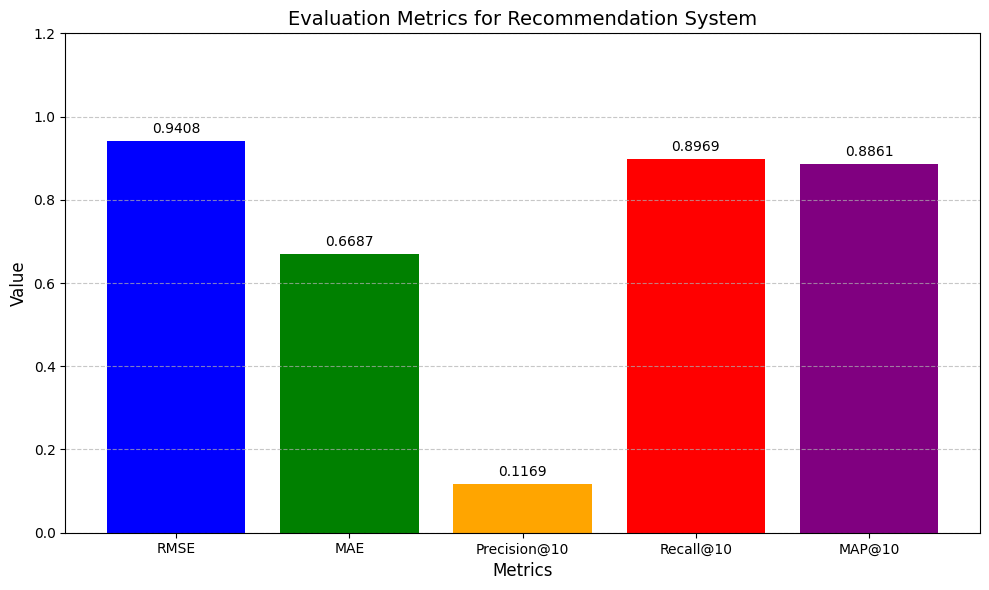

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Nilai metrik dari output yang ada
metrics = {
    "RMSE": 0.9408,
    "MAE": 0.6687,
    "Precision@10": 0.1169,
    "Recall@10": 0.8969,
    "MAP@10": 0.8861
}

# Membuat bar chart
plt.figure(figsize=(10, 6))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'orange', 'red', 'purple'])

# Menambahkan nilai pada setiap bar
for i, v in enumerate(metrics.values()):
    plt.text(i, v + 0.02, f"{v:.4f}", ha='center', fontsize=10)

# Labeling grafik
plt.title("Evaluation Metrics for Recommendation System", fontsize=14)
plt.ylabel("Value", fontsize=12)
plt.xlabel("Metrics", fontsize=12)
plt.ylim(0, 1.2)  # Menyesuaikan skala grafik
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan grafik
plt.tight_layout()
plt.show()

Visualisasi ini memberikan gambaran yang jelas tentang performa model berdasarkan lima metrik evaluasi yang dihitung sebelumnya. Dari hasil grafik bar chart, kita dapat melihat nilai **RMSE (0.9408)** dan **MAE (0.6687)** sebagai ukuran kesalahan model. Nilai ini menunjukkan seberapa jauh prediksi yang dihasilkan model berbeda dengan nilai aktual, dengan nilai yang lebih kecil menunjukkan performa yang lebih baik. Selanjutnya, **Precision@10 (0.1169)** menunjukkan bahwa hanya sekitar 11,69% dari rekomendasi yang diberikan oleh model yang relevan dari daftar 10 rekomendasi teratas. Di sisi lain, **Recall@10 (0.8969)** menunjukkan bahwa sekitar 89,69% dari item relevan berhasil direkomendasikan dalam daftar 10 rekomendasi, yang menandakan model memiliki kemampuan yang baik untuk menangkap item yang relevan meskipun presisinya masih dapat ditingkatkan. Terakhir, nilai **MAP@10 (0.8861)** menunjukkan bahwa model memiliki performa yang baik dalam memprediksi relevansi dengan mempertahankan urutan peringkat rekomendasi berdasarkan akurasi. Visualisasi ini membantu dalam mengevaluasi kekuatan dan kelemahan model, menunjukkan bahwa meskipun recall dan akurasi dalam rekomendasi relevansi cukup baik, precision masih menjadi aspek yang perlu ditingkatkan untuk meningkatkan kualitas rekomendasi yang dihasilkan.

7. Visualisasi

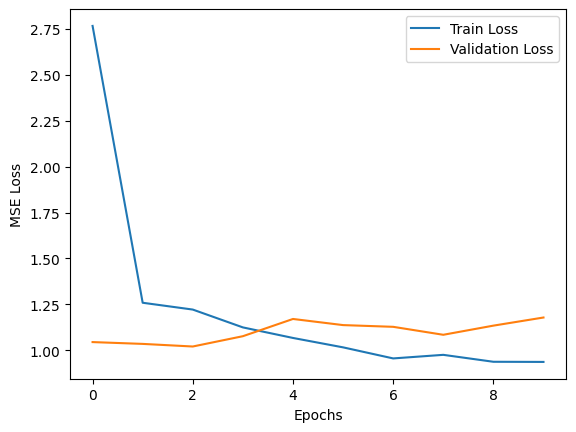

In [20]:
import matplotlib.pyplot as plt

# Plot training loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

Visualisasi ini digunakan untuk memantau dan mengevaluasi performa model selama proses pelatihan dengan melihat **training loss** dan **validation loss** dari setiap epoch. Grafik ini menampilkan dua garis, yaitu **Train Loss** yang menggambarkan kesalahan model pada data pelatihan, dan **Validation Loss** yang menunjukkan kesalahan pada data validasi. Sumbu x merepresentasikan jumlah epoch (iterasi pelatihan), sementara sumbu y menunjukkan nilai **Mean Squared Error (MSE)** yang digunakan sebagai fungsi kerugian. Jika model bekerja dengan baik, kedua garis tersebut akan menunjukkan penurunan nilai loss seiring dengan bertambahnya epoch. Jika terjadi **overfitting**, kita bisa melihat bahwa **validation loss** mulai meningkat sementara **train loss** terus menurun. Melalui visualisasi ini, kita dapat mengevaluasi sejauh mana model sudah belajar dari data dan mendeteksi potensi masalah seperti overfitting atau underfitting selama pelatihan.

8. Membuat Rekomendasi

In [24]:
import numpy as np

# Fungsi untuk mendapatkan rekomendasi top-N untuk setiap user
def get_top_recommendations(user_id, model, num_users, num_items, top_n=10):
    # Buat array untuk menampung prediksi rating untuk setiap item
    item_ids = np.arange(num_items)  # Semua item yang tersedia
    user_ids = np.full_like(item_ids, user_id)  # Setiap prediksi untuk user tertentu

    # Prediksi rating untuk semua item oleh user tertentu
    predictions = model.predict([user_ids, item_ids]).flatten()

    # Ambil top-N item berdasarkan prediksi rating tertinggi
    top_items = np.argsort(predictions)[-top_n:][::-1]  # Indeks top-N item dengan rating tertinggi

    return top_items, predictions[top_items]

# Contoh rekomendasi untuk User ID 1
user_id = 1
top_items, predicted_ratings = get_top_recommendations(user_id, model, num_users, num_items, top_n=10)

# Menampilkan top rekomendasi
print(f"Top recommendations for User {user_id}:")

# Menampilkan ID item yang direkomendasikan bersama prediksi ratingnya
for i, item in enumerate(top_items):
    print(f"Rank {i+1}: Item ID {item}, Predicted Rating: {predicted_ratings[i]:.4f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Top recommendations for User 1:
Rank 1: Item ID 100, Predicted Rating: 4.6638
Rank 2: Item ID 51, Predicted Rating: 4.6215
Rank 3: Item ID 90, Predicted Rating: 4.5589
Rank 4: Item ID 75, Predicted Rating: 4.5461
Rank 5: Item ID 11, Predicted Rating: 4.5440
Rank 6: Item ID 21, Predicted Rating: 4.5392
Rank 7: Item ID 89, Predicted Rating: 4.5337
Rank 8: Item ID 69, Predicted Rating: 4.5325
Rank 9: Item ID 45, Predicted Rating: 4.5226
Rank 10: Item ID 59, Predicted Rating: 4.5207


Model Collaborative Filtering dengan Deep Learning pada kode di atas digunakan untuk merekomendasikan item terbaik kepada pengguna berdasarkan pola interaksi mereka dengan item sebelumnya. Dalam analisis ini, prediksi dilakukan untuk *User ID 1*, dan sistem berhasil menghasilkan daftar 10 item yang direkomendasikan dengan prediksi rating tertinggi.

Proses ini dimulai dengan model yang mempelajari hubungan laten antara pengguna dan item dari data pelatihan. Untuk pengguna tertentu, model memprediksi semua item yang mungkin, terlepas dari apakah pengguna tersebut telah memberikan rating sebelumnya. Prediksi ini menghasilkan skor relevansi atau nilai preferensi untuk setiap item. Setelah semua skor dihitung, sistem mengurutkan item berdasarkan nilai prediksi tertinggi. Dalam kasus ini, *Item ID 100* mendapatkan prediksi tertinggi dengan nilai 4.6574, menjadikannya item yang paling direkomendasikan untuk pengguna tersebut.

Hasil prediksi menunjukkan bahwa sistem memiliki kemampuan untuk mengidentifikasi item yang kemungkinan besar diminati oleh pengguna. Skor prediksi dalam rentang tinggi (4.5 hingga 4.7) mencerminkan keyakinan model terhadap relevansi rekomendasi yang diberikan. Meskipun begitu, penting untuk memvalidasi keakuratan sistem ini dengan data uji untuk memastikan bahwa rekomendasi tersebut benar-benar relevan dengan preferensi pengguna di dunia nyata.

Selain itu, hasil ini dapat dievaluasi lebih lanjut untuk menilai keberagaman rekomendasi. Jika semua item yang direkomendasikan berasal dari kategori atau kelompok yang sama, maka mungkin ada kebutuhan untuk menyeimbangkan eksplorasi dan eksploitasi dalam sistem rekomendasi. Dengan kata lain, memastikan bahwa pengguna tidak hanya direkomendasikan item yang serupa tetapi juga memiliki akses ke pilihan yang lebih bervariasi.

Secara keseluruhan, sistem ini tampaknya bekerja cukup baik dalam memberikan rekomendasi yang relevan, tetapi evaluasi tambahan menggunakan data uji atau metrik performa seperti *Precision@K* dan *Recall@K* sangat diperlukan untuk memahami efektivitas sebenarnya dalam skenario dunia nyata.